In [2]:
# Load Dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [3]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
x = dataset.data
y = dataset.target

In [7]:
# Whiten the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

print("Mean:\n", scaler.mean_)
print("Var:\n", scaler.var_)
print("Samples seen: ", scaler.n_samples_seen_)

Mean:
 [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
Var:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Samples seen:  569


In [9]:
print("Examples from Dataset after Whitening: ")
print(dataset.data[0])
print(x[0])
print(y[0])

Examples from Dataset after Whitening: 
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]
0


In [14]:
# Import PCA from SKlearn
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components, copy=True)
pca.fit(x)

transformed_x = pca.transform(x)

In [15]:
# PCA Variables and Data

print("Components:\n", pca.components_)
print("Explained Variance: ", pca.explained_variance_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
print("Sum of Explained Variance Ratio: ", sum(pca.explained_variance_ratio_))

Components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
Explained Variance:  [13.30499079  5.7013746 ]
Explained Variance Ratio:  [0.44272026 0.18971182]
Sum of Explained Variance Ratio:  0.6324320765155941


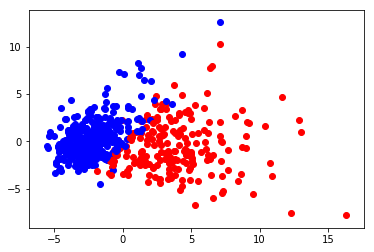

In [16]:
# Plot the new 2D Data
colors = ["red", "blue"]
for index, point in enumerate(transformed_x):
    plt.scatter(point[0], point[1], color=colors[y[index]])
plt.show()

#### Programmieraufgabe

In [10]:
# Aufgabe 1:
# Find die Anzahl an Dimensionen, um 90% der Varianz "zu erklären"



In [11]:
# Aufgabe 2:
# Wende das gefundene Setup auf die Daten an



In [12]:
# Aufgabe 3:
# Split das Dataset in ein Train and Testset



In [13]:
# Aufgabe 4:
# Wende das KNN-Verfahren an



In [14]:
# Aufgabe 5:
# Wende das KNN mit Whitening und ohne PCA an



In [15]:
# Aufgabe 6:
# Wende das KNN ohne Whitening und ohne PCA an

